# ИССЛЕДОВАНИЕ СПЕКТРАЛЬНОЙ ПЛОТНОСТИ МОЩНОСТИ МОДУЛИРОВАННЫХ СИГНАЛОВ
### Шаповалов Иван РЛ1-83

__Цель работы__ – изучение спектральной плотности мощности модулированных сигналов.

__Задачи работы__ – ознакомление с теоретическим материалом по данным методическим указаниям, выполнение работы в указанном порядке, углубление практических навыков в результате проведения математических экспериментов


_вариант 16_

| N | Схема модулятора                          |
|----|------------------------------------------|
| 8 | ФМ-4, ФМ-4 со сдвигом со сглаживанием, АМ |


In [1]:

import numpy as np                  # подключение библиотеки работы с массивами
from numpy.fft import fft, fftshift # подключение библиотеки цифровой обработки сигналов
import matplotlib.pyplot as plt     # подключение библиотеки представления данных
from scipy import constants as const
from math import sin, cos, pi, sqrt
from scipy import signal, integrate

In [2]:
f = 555        # несущая частота
fs = 10*f      # частот дискретизации сигнала
dt = 1/fs       # шаг дискретизации сигнала
n = 5           # число периодов на длительности символа T
T = n/f        # длительность одного символа из 5 полных периодов
seed = 2023 + 16
U_0 = 1
h = 1 
phi_0 = 0
nperiods = 10
fd = 10 * f

In [3]:
print('symbol duration is %.2f'%(T),'s')
ns = int(fs*T)  # число отсчетов на один символ передаваемого сообщения
print('number of samples per symbol is ',ns)

symbol duration is 0.01 s
number of samples per symbol is  50


In [4]:

# функция возвращающая телеграфный сигнал с заданной амплитудой h
def get_telegraph_signal(h = 1.0, seed = 1):
    # генерация тысяча отсчетов равномерно распределенных чисел [0,1)
    data = np.random.default_rng(seed).random(1000)
    # преобразование отсчетов 
    symOne = 1*(data >= 0.5)
    symZero = -1*(data < 0.5)
    # результат, двумерный массив:значения и номера символов
    return (h*(symOne + symZero), range(len(data))) 

In [5]:
def GetExp(data):
    Rexp = 1/len(data)*np.correlate(data, data, mode='full')     # экспериментальное определение КФ

    fexp = np.linspace(-0.5*fs, 0.5*fs, len(Rexp))       # шкала частот к экспериментальному ПФ
    texp = np.arange(-dt*(len(data)-1), dt*len(data), dt)     # шкала времени к результату вычисления КФ

    Gexp = np.fft.fft(Rexp)                             # преобразование Фурье от случайного сигнала
    Gexp = np.abs(np.fft.fftshift(Gexp))                # центрируем результат БПФ и берем модуль

    return (Rexp, texp, Gexp, fexp)

In [6]:
def to_samples(x, f0 = f, nperiods = 10):
    T = nperiods / f0
    ns = int(fd * T)
    print("Число отсчётов, приходящихся на один символ: ", ns)
    xs = np.array([np.ones(ns)*i for i in x])
    xs = np.reshape(xs, -1)
    t = np.arange(0, dt * len(xs), dt)
    #xs = xs * np.sin(2 * np.pi * f0 * t)
    return (xs, t, T)

# Четырехкратная фазовая модуляция (ФМ-4)

__Формирование сигнала ФН-4__

In [7]:
x_fm4, numbers_fm4 = get_telegraph_signal(1, seed)  # генерация символов случайной последовательности
# x1,numbers1 = get_telegraph_signal(1, 2023 + 16)  # генерация символов случайной последовательности
# x2,numbers2 = get_telegraph_signal(1, 2023 + 15)  # генерация символов случайной последовательности
s_fm4, t_fm4, T_fm4= to_samples(x_fm4, f, nperiods = nperiods)

Число отсчётов, приходящихся на один символ:  100


In [8]:
# s_fm4 = np.array([np.ones(ns)*i for i in x_fm4]) # "растяжение" одного символа во времени
# s_fm4 = np.reshape(s_fm4, -1)                    # трансформация в 1d массив



# s_fm4_1 = np.array([np.ones(ns)*i*2 for i in ]) # "растяжение" одного символа во времени
# s_fm4_1 = np.reshape(s_fm4_1, -1)                    # трансформация в 1d массив
(s_fm4_1, t_fm4_1, T_fm4_1) = to_samples(x_fm4[:-1:2], f, nperiods = nperiods*2)


# t_fm4 = np.arange(0, dt*len(s_fm4_1), dt)         # шкала времени полученных отсчетов

# s_fm4_2 = np.array([np.ones(ns)*i*2 for i in x_fm4[1::2]]) # "растяжение" одного символа во времени
# s_fm4_2 = np.reshape(s_fm4_2, -1)                    # трансформация в 1d массив
(s_fm4_2, t_fm4_2, T_fm4_2) = to_samples(x_fm4[1::2], f, nperiods = nperiods*2)

# s1 = np.array([np.ones(ns)*i for i in x1]) # "растяжение" одного символа во времени
# s1 = np.reshape(s1, -1)                    # трансформация в 1d массив
# t = np.arange(0, dt*len(s1), dt)         # шкала времени полученных отсчетов


# s2 = np.array([np.ones(ns)*i for i in x2]) # "растяжение" одного символа во времени
# s2 = np.reshape(s2, -1)                    # трансформация в 1d массив


Число отсчётов, приходящихся на один символ:  200
Число отсчётов, приходящихся на один символ:  200


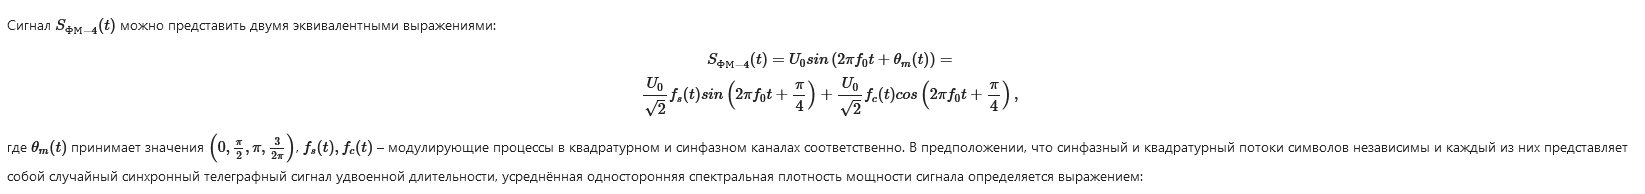

In [9]:
QPSK4_modulation = lambda f_s, f_c, t, u_0 = U_0, f_0 = f: u_0/np.sqrt(2)*f_s*np.sin(2*np.pi*f_0*t + np.pi/4) + u_0/np.sqrt(2)*f_c*np.cos(2*np.pi*f_0*t + np.pi/4)

In [10]:
QPSK4_sig = [QPSK4_modulation(s_fm4_1[i], s_fm4_2[i], t_fm4_1[i]) for i in range(len(s_fm4_1))]

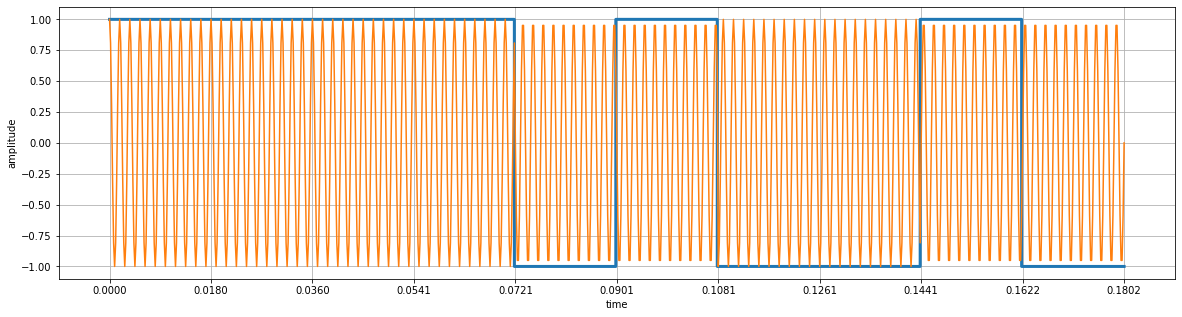

In [11]:
# fig,ax2 = plt.subplots(2, 1, figsize=(12, 3))
# ax2[0].step(numbers1[:10], x1[:10], where='post', label = 'телеграфный сигнал') # отображение символов
# ax2[0].set_xlabel('symbols')                    # подписи для осей графика
# ax2[0].set_ylabel('amplitude')
# ax2[0].legend()

# ax2[1].plot(t[:500], QPSK4_sig[:500], label = 'QPSK4')                   # отображение отсчетов
# ax2[1].set_xlabel('samples')                    # подписи для осей графика
# ax2[1].set_ylabel('amplitude')
# ax2[1].legend()

fig7, ax7 = plt.subplots(figsize = (20, 5))
ax7.step(t_fm4[:1001], s_fm4[:1001], linewidth= 3)
ax7.plot(t_fm4[:1001], QPSK4_sig[:1001])
ax7.set_xlabel('time')
ax7.set_ylabel('amplitude')
ax7.set_xticks(np.arange(0, t_fm4[1001], 10 / f));
ax7.grid()

__Корреляционная функция ФН-4__

In [12]:
def R(tau, T = T, h = 1):
    tselect = 1*(np.abs(tau) <= T)
    data = h**2*(1-abs(tau)/T)
    return  tselect * data

In [13]:
Rexp_fm4, texp_fm4, Gexp_fm4, fexp_fm4 = GetExp(QPSK4_sig)
fteor = np.linspace(-fs, fs, len(Rexp_fm4))     # шкала частот
tteor = np.arange(-15*T, 15*T, step=dt)             # шкала времени для теоретической КФ

__Спектральная плотность мощьности ФН-4__


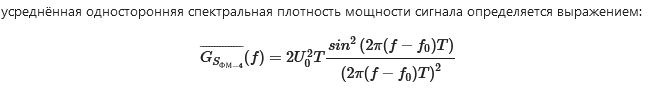

In [14]:
G_fm4 = lambda f, T, f_0 = f, U_0 = U_0: 2*U_0**2*T*np.sin(2*np.pi*(f - f_0)*T)**2/(2*np.pi*(f - f_0)*T)**2
G_fm4_vec = np.vectorize(G_fm4, excluded=['T', 'f_0', 'U_0'])

In [15]:
G_fm4_data = G_fm4(fteor, T = T_fm4)

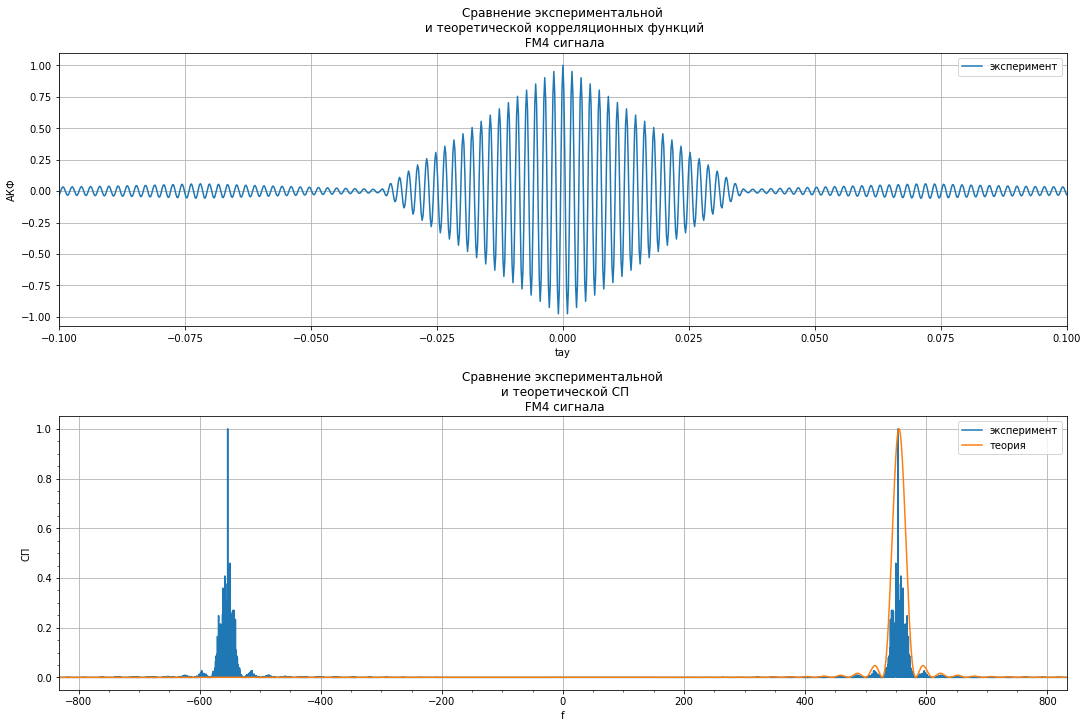

In [16]:
fig8, ax8 = plt.subplots(2, 1, figsize = (15, 10), constrained_layout=True)

ax8[0].plot(texp_fm4, Rexp_fm4/max(Rexp_fm4), label = 'эксперимент')
ax8[0].set_xlabel('tay')
ax8[0].set_ylabel('АКФ')
ax8[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n FM4 сигнала')
ax8[0].set_xlim(-0.1, 0.1)
ax8[0].legend()
ax8[0].grid()

ax8[1].plot(fexp_fm4, Gexp_fm4/max(Gexp_fm4), label = 'эксперимент')
ax8[1].plot(fteor, G_fm4_data/max(G_fm4_data), label = 'теория')
ax8[1].set_xlabel('f')
ax8[1].set_ylabel('СП')
ax8[1].set_title('Сравнение экспериментальной\n и теоретической СП\n FM4 сигнала')
ax8[1].set_xlim(-1.5*f, 1.5*f)
ax8[1].legend()
ax8[1].minorticks_on()
ax8[1].grid()

# ФМ-4 со сдвигом со сглаживанием

In [34]:
x_shift_smooth, numbers_shift_smooth = get_telegraph_signal(1, seed)  # генерация символов случайной последовательност
# (s_shift_smooth, t_shift_smooth, T_shift_smooth) = to_samples(x_shift_smooth, f, nperiods = nperiods)

In [35]:

n_zero = round(0.1*len(x_shift_smooth[:-1:2]))
(s_shift_1, t_shift_1, T_shift_1) = to_samples(np.concatenate((x_shift_smooth[:-1:2], np.zeros(n_zero))), f, nperiods = nperiods*2)
(s_shift_2, t_shift_2, T_shift_2) = to_samples(np.concatenate((np.zeros(n_zero), x_shift_smooth[1::2])), f, nperiods = nperiods*2)

Число отсчётов, приходящихся на один символ:  200
Число отсчётов, приходящихся на один символ:  200


In [38]:
QPSK4_shift_smooth = [QPSK4_modulation(s_shift_1[i], s_shift_2[i], t_shift_1[i]) for i in range(len(s_shift_1))]*np.abs(np.sin(2*np.pi/T_shift_1*t_shift_1))

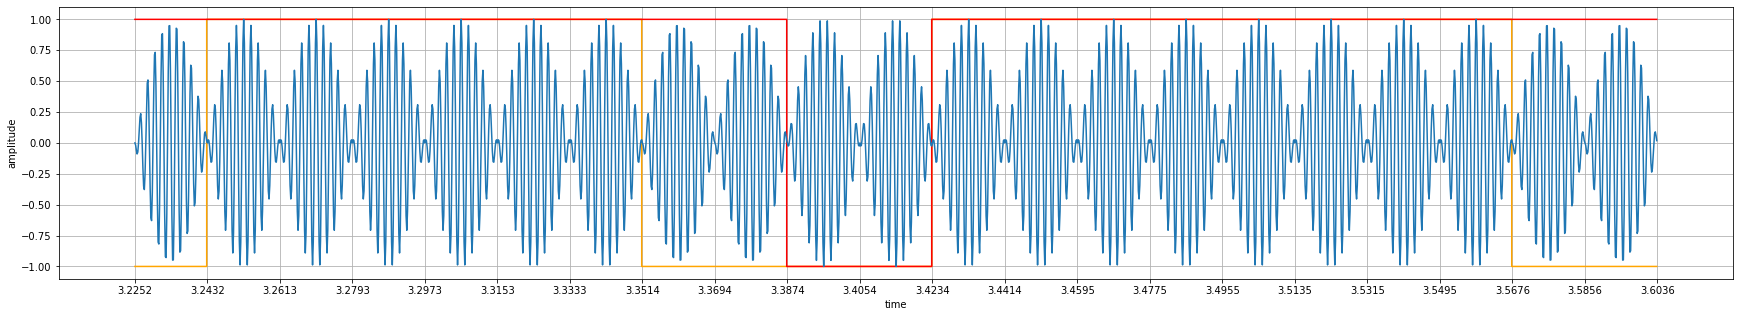

In [83]:
N_start = 17900
N_stop = 20000
fig12, ax12 = plt.subplots(figsize = (30, 5))
ax12.step(t_shift_1[N_start:N_stop], s_shift_1[N_start:N_stop], color = 'orange')
ax12.step(t_shift_1[N_start:N_stop], s_shift_2[N_start:N_stop], color = 'red')
ax12.plot(t_shift_1[N_start:N_stop], QPSK4_shift_smooth[N_start:N_stop])
ax12.set_xlabel('time')
ax12.set_ylabel('amplitude')
ax12.set_xticks(np.arange(t_shift_1[N_start], t_shift_1[N_stop], 10 / f));
#ax12.set_xlim(1.1, 1.3)
ax12.grid()

In [79]:
Rexp_QPSK4_shift_smooth, texp_QPSK4_shift_smooth, Gexp_QPSK4_shift_smooth, fexp_QPSK4_shift_smooth = GetExp(QPSK4_shift_smooth)

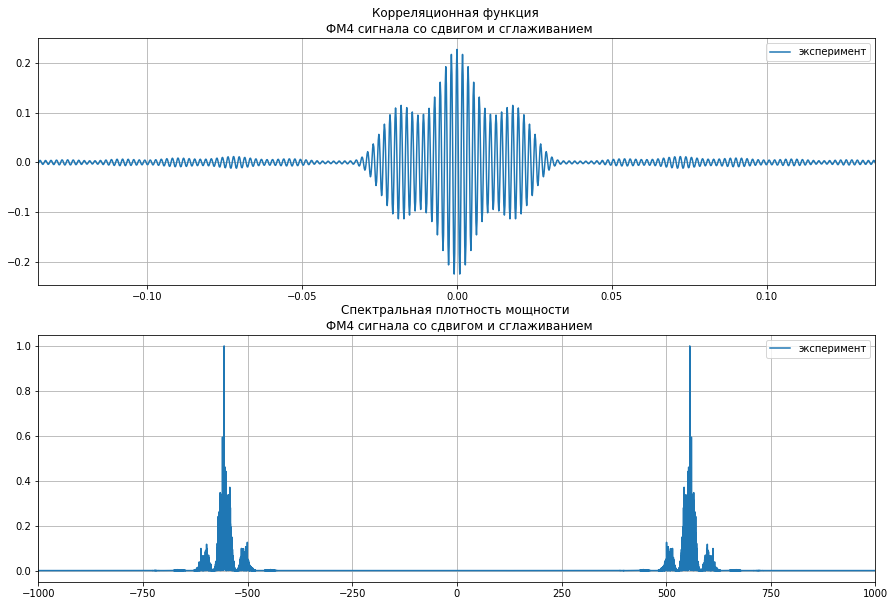

In [87]:
N_stop = 10000
fig4,ax4 = plt.subplots(2, 1, figsize = (15,10))

ax4[0].plot(texp_QPSK4_shift_smooth, Rexp_QPSK4_shift_smooth, label='эксперимент')      # отображение КФ
ax4[0].set_xlim(-15*T,15*T)
ax4[0].grid(), ax4[0].legend()
ax4[0].set_title('Корреляционная функция \n ФМ4 сигнала со сдвигом и сглаживанием')

ax4[1].plot(fexp_QPSK4_shift_smooth, Gexp_QPSK4_shift_smooth/max(Gexp_QPSK4_shift_smooth), label='эксперимент')        # отображение спектра
ax4[1].set_xlim(-1000,1000)
ax4[1].set_title('Спектральная плотность мощности \n ФМ4 сигнала со сдвигом и сглаживанием')
ax4[1].grid(), ax4[1].legend();

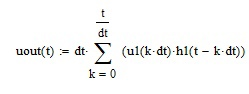

In [20]:
def duhamel_integral(t, tau, f):
    integrand = lambda s: f(t - s)  # Функция для интегрирования
    result, _ = integrate.quad(integrand, 0, tau)
    return result

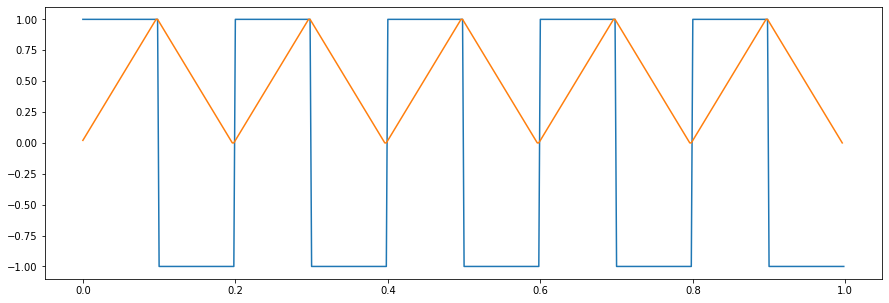

In [21]:

t = np.linspace(0, 1, 500, endpoint=False)
sig =  signal.square(2 * np.pi * 5 * t)
integr = integrate.cumtrapz(sig, t)
integr2 = sig*np.abs(np.sin(2 * np.pi * 5 * t))
integr3 = sig*np.abs(np.sin(2 * np.pi * 5 * t))

plt.figure(figsize=(15,5))
# plt.subplot(3, 1, 1)
plt.plot(t, sig/max(sig))
# plt.subplot(3, 1, 2)
plt.plot(t[:-1], integr/max(integr))
# plt.subplot(3, 1, 3)
# plt.plot(t, integr2/max(integr2))
# plt.plot(t, integr3/max(integr3))
# plt.ylim(-2, 2)

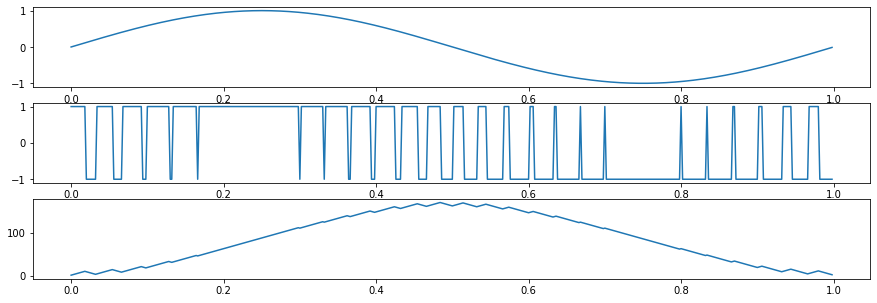

In [22]:

t = np.linspace(0, 1, 500, endpoint=False)
plt.figure(figsize=(15,5))
sig = np.sin(2 * np.pi * t)
pwm = signal.square(2 * np.pi * 30 * t, duty=(sig + 1)/2)
integr = np.cumsum(pwm)
plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.subplot(3, 1, 2)
plt.plot(t, pwm)
plt.subplot(3, 1, 3)
plt.plot(t, integr)
# plt.ylim(-1.5, 1.5)

In [23]:
s_shift_1 = np.array(list(np.zeros(int(T/dt))) + list(s_shift_1))
s_shift_2 = np.array(list(s_shift_2) + list(np.zeros(int(T/dt))))

# Амплитудно-манипулированный сигнал (АМ сигнал)

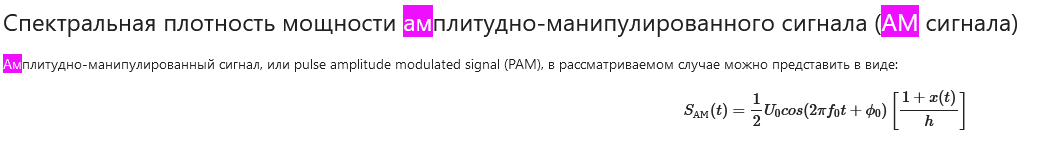

In [24]:
PAM_modulation = lambda t , x, U_0 = U_0, f_0 = f, phi_0 = phi_0, h = h: 1/2*U_0*np.cos(2*np.pi*f_0*t + phi_0)*((1 + x)/h)
# PAM_modulation_vec = np.vectorize(PAM_modulation, excluded=[ 'U_0','f_0','phi_0','h'])

In [25]:
x_pam,numbers_pam = get_telegraph_signal(1, seed)  # генерация символов случайной последовательности
s_pam = np.array([np.ones(ns)*i for i in x_pam]) # "растяжение" одного символа во времени
s_pam = np.reshape(s_pam, -1)                    # трансформация в 1d массив
t_pam = np.arange(0, dt*len(s_pam), dt)         # шкала времени полученных отсчетов
PAM_data = PAM_modulation(t_pam, s_pam)

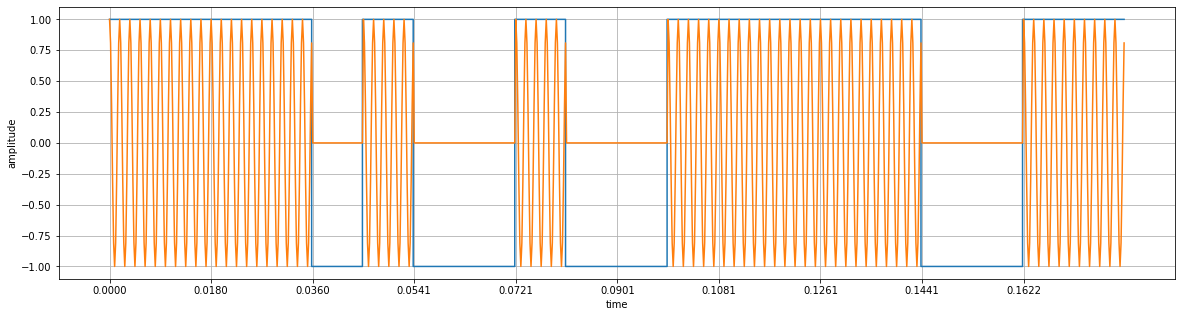

In [26]:
N_stop = 1000
fig12, ax12 = plt.subplots(figsize = (20, 5))
ax12.step(t_pam[:N_stop], s_pam[:N_stop])
ax12.plot(t_pam[:N_stop], PAM_data[:N_stop])
ax12.set_xlabel('time')
ax12.set_ylabel('amplitude')
ax12.set_xticks(np.arange(0, t_pam[N_stop], 10 / f));
#ax12.set_xlim(1.1, 1.3)
ax12.grid()

In [27]:
Rexp_pam, texp_pam, Gexp_pam, fexp_pam = GetExp(PAM_data)

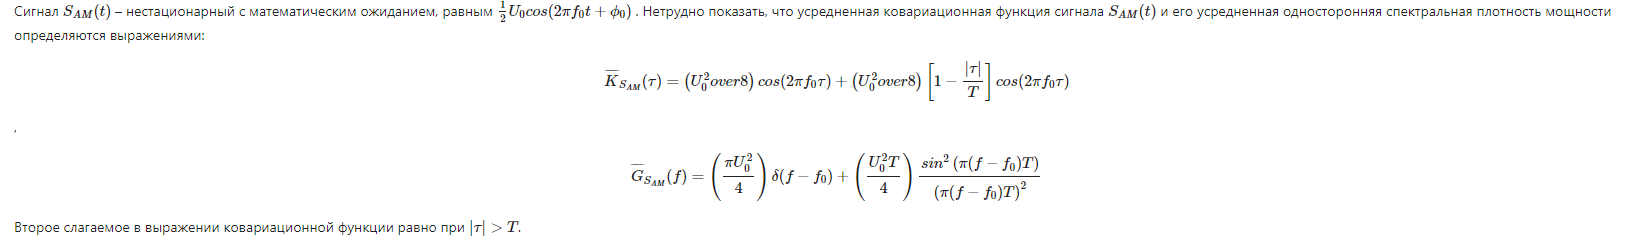

In [28]:
K_pam = lambda  tau, U_0 = U_0, f_0 = f, T = T:  U_0**2/8*np.cos(2*np.pi*tau*f_0) + U_0**2/8*(1 - np.abs(tau)/T)*np.cos(2*np.pi*f_0*tau)
G_pam = lambda  f, U_0 = U_0, f_0 = f, T = T: (np.pi*U_0**2/4)*(f == f_0) + (np.pi*U_0**2/4)*np.sin(np.pi*(f - f_0)*T)**2/((np.pi*(f - f_0)*T)**2)

In [29]:
fteor = np.linspace(-0.5*fs, 0.5*fs, len(Rexp_pam))     # шкала частот
tteor = np.arange(-15*T, 15*T, step=dt)             # шкала времени для теоретической КФ

G_pam_data = G_pam(fteor)

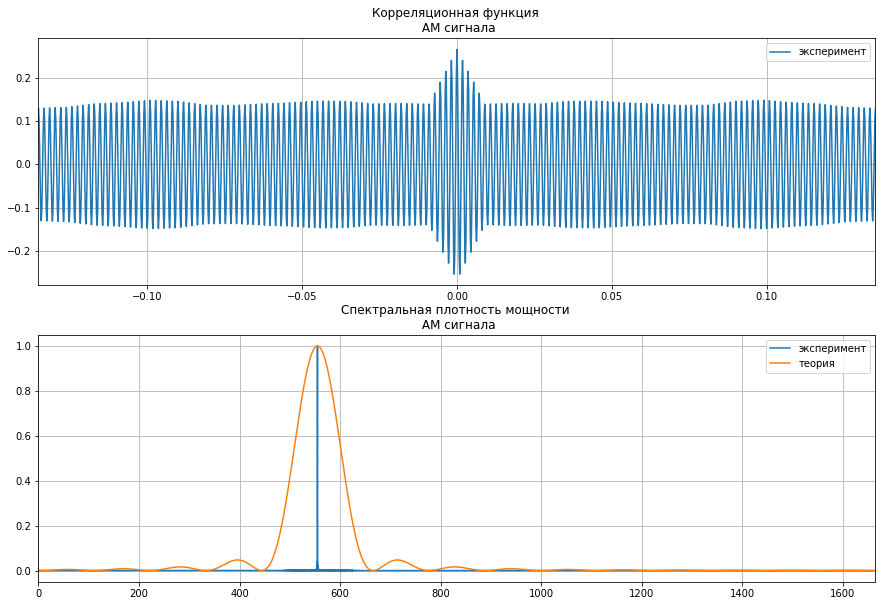

In [30]:
N_stop = 10000
fig4,ax4 = plt.subplots(2, 1, figsize = (15,10))

ax4[0].plot(texp_pam, Rexp_pam, label='эксперимент')      # отображение КФ
# ax4[0].plot(tteor, R(tteor,T), label='теория')
ax4[0].set_xlim(-15*T,15*T)
ax4[0].grid(), ax4[0].legend()
ax4[0].set_title('Корреляционная функция \n АМ сигнала')

ax4[1].plot(fexp_pam[:], Gexp_pam[:]/max(Gexp_pam), label='эксперимент')        # отображение спектра
ax4[1].plot(fteor[:],G_pam_data[:]/max(G_pam_data),label='теория')
ax4[1].set_xlim(0,3/dt/10)
# ax4[1].set_xlim(0,1000)
ax4[1].set_title('Спектральная плотность мощности \n АМ сигнала')
ax4[1].grid(), ax4[1].legend();